In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor
from pandas.tools.plotting import scatter_matrix
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
warnings.filterwarnings('ignore')

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from sklearn.model_selection import StratifiedKFold
from keras.constraints import maxnorm
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [5]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [6]:
# load dataset
df = pd.read_csv('ENB2012_data.csv')

In [7]:
# Assign names to Columns
df.columns = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height',
                     'orientation', 'glazing_area', 'glazing_area_distribution', 'heating_load', 'cooling_load']

In [8]:
df.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [9]:
print("Statistical Description:", df.describe())

Statistical Description:        relative_compactness  surface_area   wall_area   roof_area  \
count            768.000000    768.000000  768.000000  768.000000   
mean               0.764167    671.708333  318.500000  176.604167   
std                0.105777     88.086116   43.626481   45.165950   
min                0.620000    514.500000  245.000000  110.250000   
25%                0.682500    606.375000  294.000000  140.875000   
50%                0.750000    673.750000  318.500000  183.750000   
75%                0.830000    741.125000  343.000000  220.500000   
max                0.980000    808.500000  416.500000  220.500000   

       overall_height  orientation  glazing_area  glazing_area_distribution  \
count       768.00000   768.000000    768.000000                  768.00000   
mean          5.25000     3.500000      0.234375                    2.81250   
std           1.75114     1.118763      0.133221                    1.55096   
min           3.50000     2.000000   

In [10]:
print("Shape:", df.shape)

Shape: (768, 10)


In [12]:
print("Data Types:", df.dtypes)
plt.figure(figsize = (24,24))
sns.heatmap(btc.corr(), vmax=0.8, linewidths=0.01,
            square=True, annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features')plt.figure(figsize = (24,24))
sns.heatmap(btc.corr(), vmax=0.8, linewidths=0.01,
            square=True, annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features')plt.figure(figsize = (24,24))
sns.heatmap(btc.corr(), vmax=0.8, linewidths=0.01,
            square=True, annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features')

SyntaxError: invalid syntax (<ipython-input-12-5b519133fe77>, line 5)

In [13]:
df.shape

(768, 10)

In [14]:
import seaborn as sns
plt.figure(figsize = (11,11))
sns.heatmap(df.corr(), vmax=0.8, linewidths=0.01,
            square=True, annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features')

Text(0.5,1,'Correlation between features')

In [15]:
print("Correlation:", df.corr(method='pearson'))

Correlation:                            relative_compactness  surface_area     wall_area  \
relative_compactness               1.000000e+00 -9.919015e-01 -2.037817e-01   
surface_area                      -9.919015e-01  1.000000e+00  1.955016e-01   
wall_area                         -2.037817e-01  1.955016e-01  1.000000e+00   
roof_area                         -8.688234e-01  8.807195e-01 -2.923165e-01   
overall_height                     8.277473e-01 -8.581477e-01  2.809757e-01   
orientation                        0.000000e+00  0.000000e+00  0.000000e+00   
glazing_area                       1.283986e-17  1.318356e-16 -7.969726e-19   
glazing_area_distribution          1.764620e-17 -3.558613e-16  0.000000e+00   
heating_load                       6.222722e-01 -6.581202e-01  4.556712e-01   
cooling_load                       6.343391e-01 -6.729989e-01  4.271170e-01   

                              roof_area  overall_height  orientation  \
relative_compactness      -8.688234e-01    8.

### 'overall_height' has the highest correlation with 'heating_load' and 'cooling_load' (which is a positive correlation),followed by 'roof_area' for both outputs which is a negative correlation, 'orientation' has the least correlation

In [18]:
X = df.iloc[:,0:8].values
Y1 = df.iloc[:,8].values
Y2 = df.iloc[:,9].values

In [19]:
X.shape

(768, 8)

In [20]:
#Feature Selection
model = ExtraTreesRegressor()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y1)

print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_) 

Number of Features:  3
Selected Features:  [False False  True  True  True False False False]
Feature Ranking:  [3 4 1 1 1 6 2 5]


###  'wall_area', 'roof_area' and 'overall_height' were top 3 selected features/feature combination for predicting 'heating_load' using Recursive Feature Elimination, the 2nd and 3rd selected features were atually among the attributes with the highest correlation with the 'heating_load'

In [21]:
#Feature Selection
model = ExtraTreesRegressor()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y2)

print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_)

Number of Features:  3
Selected Features:  [ True False  True False  True False False False]
Feature Ranking:  [1 3 1 6 1 5 2 4]


### 'wall_area', 'glazing_area' and 'overall_height' were top 3 selected features/feature combination for predicting 'cooling_load' using Recursive Feature Elimination

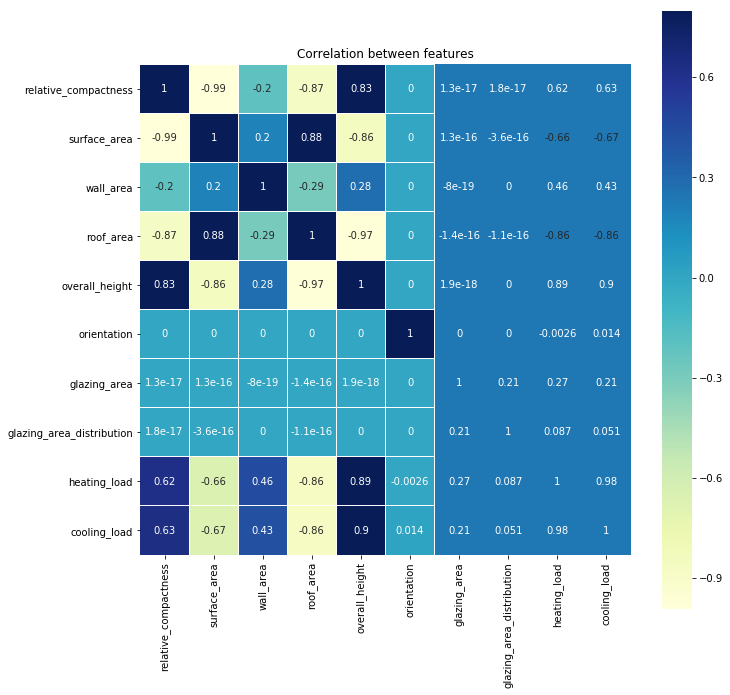

In [22]:
plt.hist((df.heating_load))
plt.show()

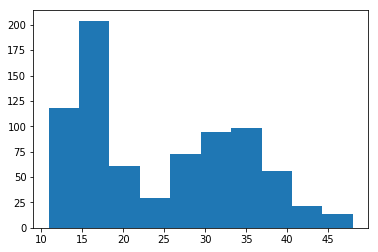

In [23]:
plt.hist((df.cooling_load))
plt.show()

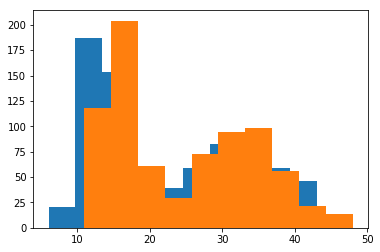

In [24]:
plt.hist((df.heating_load))
plt.hist((df.cooling_load))
plt.show()

### Most of the dataset's samples fall between 10 and 20 of both 'heating_load' and 'cooling_load' regressional output classes, with a positive skew

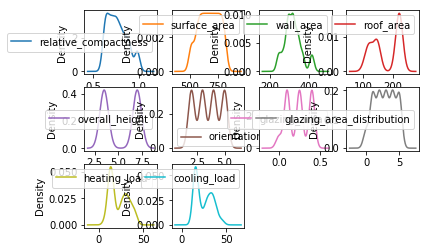

In [25]:
df.plot(kind='density', subplots=True, layout=(3,4), sharex=False, sharey=False)
plt.show()

### Majority of the features have a positive skew except for a few, 'oreintation' and 'overall_height' have quite even distribution

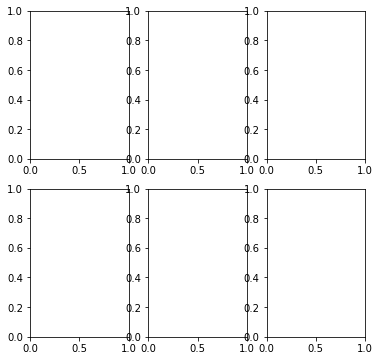

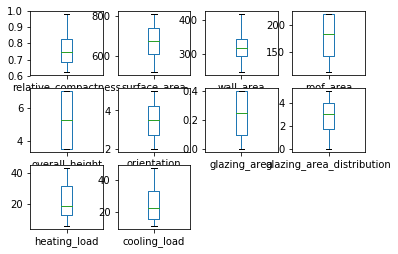

In [18]:
axes = plt.subplots(nrows=2, ncols=3, figsize=(6, 6))
df.plot(kind='box', subplots=True, layout=(3,4), sharex=False, sharey=False)
plt.show()

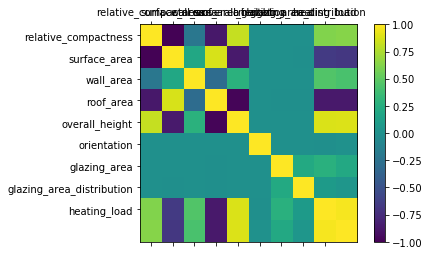

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [21]:
num_instances = len(X)

models = []
models.append(('LiR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('Bag_Re', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

# Evaluations
results = []
names = []
scoring = []

for name, model in models:
    # Fit the model
    model.fit(X, Y1)
    
    predictions = model.predict(X)
    
    # Evaluate the model
    kfold = cross_validation.KFold(n=num_instances, n_folds=10, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X, Y1, cv=10)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LiR: 0.892071 (0.064387)
Ridge: 0.888898 (0.073554)
Lasso: 0.739750 (0.185156)
ElasticNet: 0.751113 (0.184069)
Bag_Re: 0.969104 (0.082573)
RandomForest: 0.968549 (0.084006)
ExtraTreesRegressor: 0.968964 (0.082321)
KNN: 0.885004 (0.194983)
CART: 0.968717 (0.082255)
SVM: 0.837300 (0.149457)


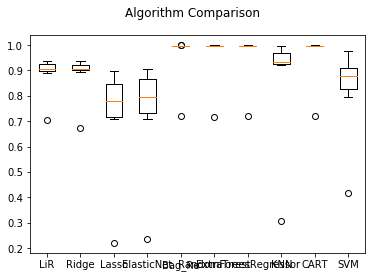

In [22]:
#boxplot algorithm Comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [23]:
# Evaluations
results = []
names = []
scoring = []

for name, model in models:
    # Fit the model
    model.fit(X, Y2)
    
    predictions = model.predict(X)
    
    # Evaluate the model
    kfold = cross_validation.KFold(n=num_instances, n_folds=10, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X, Y2, cv=10)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LiR: 0.877039 (0.033182)
Ridge: 0.870432 (0.036123)
Lasso: 0.751754 (0.101792)
ElasticNet: 0.762353 (0.098235)
Bag_Re: 0.963511 (0.023490)
RandomForest: 0.963513 (0.024185)
ExtraTreesRegressor: 0.950385 (0.022356)
KNN: 0.924107 (0.088863)
CART: 0.955078 (0.021109)
SVM: 0.859163 (0.076793)


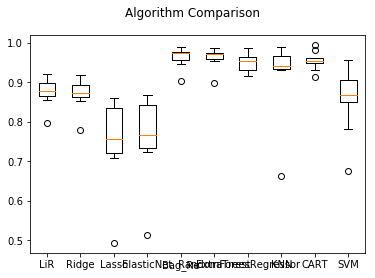

In [24]:
#boxplot algorithm Comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### 'Random Forest' and 'Bagging Regressor' are the best estimators/models for 'cooling_load', they can be further explored and their hyperparameters tuned

In [25]:
# Define 10-fold Cross Valdation Test Harness
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

In [26]:
# Define 10-fold Cross Valdation Test Harness
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)
cvscores = []

for train, test in kfold.split(X, Y2):
    
    # create model
    model = Sequential()
    model.add(Dense(15, input_dim=8, init='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, init='uniform', activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(5, init='uniform', activation='relu'))
    model.add(Dense(1, init='uniform'))

    # Compile model
    model.compile(loss='mean_absolute_error', optimizer='sgd')

    # Fit the model
    model.fit(X[train], Y2[train], epochs=300, batch_size=10, verbose=0)

    # Evaluate the model
    scores = model.evaluate(X[test], Y2[test], verbose=0)
    print("%s: %.2f%%" % ("score", 100-scores))
    
cvscores.append(100-scores)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

score: 90.96%
score: 91.22%
score: 91.48%
91.48% (+/- 0.00%)


In [27]:
# Define 10-fold Cross Valdation Test Harness
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)
cvscores = []

for train, test in kfold.split(X, Y1):
    
    # create model
    model = Sequential()
    model.add(Dense(15, input_dim=8, init='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, init='uniform', activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(5, init='uniform', activation='relu'))
    model.add(Dense(1, init='uniform'))

    # Compile model
    model.compile(loss='mean_absolute_error', optimizer='sgd')

    # Fit the model
    model.fit(X[train], Y1[train], epochs=300, batch_size=10, verbose=0)

    # Evaluate the model
    scores = model.evaluate(X[test], Y1[test], verbose=0)
    print("%s: %.2f%%" % ("score", 100-scores))
    
cvscores.append(100-scores)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

score: 90.14%
score: 91.18%
score: 90.97%
90.97% (+/- 0.00%)


In [26]:
df['total_load'] = df['heating_load'] + df['cooling_load']

In [27]:
Y = df.iloc[:,10].values

In [32]:
# Define 10-fold Cross Valdation Test Harness
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)
cvscores = []

for train, test in kfold.split(X, Y):
    
    # create model
    model = Sequential()
    model.add(Dense(15, input_dim=8, init='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, init='uniform', activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(5, init='uniform', activation='relu'))
    model.add(Dense(1, init='uniform'))

    # Compile model
    model.compile(loss='mean_absolute_error', optimizer='sgd')

    # Fit the model
    model.fit(X[train], Y[train], epochs=300, batch_size=10, verbose=0)

    # Evaluate the model
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print("%s: %.2f%%" % ("score", 100-scores))
    
cvscores.append(100-scores)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

score: 80.59%
score: 81.87%
score: 82.32%
82.32% (+/- 0.00%)


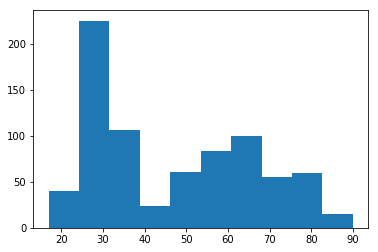

In [34]:
plt.hist((df.total_load))
plt.show()

In [28]:
#set up bins
bin = [0,40,70,100]
#use pd.cut function can attribute the values into its specific bins
category = pd.cut(df.total_load,bin)
category = category.to_frame()
category.columns = ['range']
#concatenate age and its bin
df_new = pd.concat([df,category],axis = 1)

In [29]:
df_new.dtypes

relative_compactness          float64
surface_area                  float64
wall_area                     float64
roof_area                     float64
overall_height                float64
orientation                     int64
glazing_area                  float64
glazing_area_distribution       int64
heating_load                  float64
cooling_load                  float64
total_load                    float64
range                        category
dtype: object

In [30]:
df_new.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load,total_load,range
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,36.88,"(0, 40]"
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,36.88,"(0, 40]"
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,36.88,"(0, 40]"
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,36.88,"(0, 40]"
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,49.12,"(40, 70]"


In [31]:
Y_new = df_new.iloc[:,11].values

In [32]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(Y_new)
encoded_Y = encoder.transform(Y_new)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [34]:
dummy_y

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

In [70]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=8, activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [72]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

In [74]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [76]:
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 45.68% (20.74%)


In [83]:
st="my hjgdjs * 1 2 "
word1 = st.split("[a-zA-Z]+")

In [84]:
word1

['my hjgdjs * 1 2 ']

In [88]:
import re
word1 = "".join(re.findall("[a-zA-Z]+", st))

In [87]:
re.split("[^a-zA-Z]*", st

['my', 'hjgdjs', '']

In [89]:
word1

'myhjgdjs'